In [445]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm 
from mpl_toolkits.mplot3d import Axes3D
import scipy as sp
from scipy.integrate import odeint 
import ecos

In [592]:
def csf(state, C):
    return -1/2*((state[5]-0.138)**2 + state[6]**2) + C
    
def get_path(filename):
    return "../bags/" + filename + "/"+filename+".csv"
    
class ecos_data(): 
    def __init__(self, path): 
        self.data = pd.read_csv(path)

        # Convert Strings to Arrays
        vector_keys = ['state_trueVec', 'state_measuredVec', 'input_actVec', 'input_desVec']
        for key in vector_keys:
            self.data[key] = self.data[key].str.replace('[','').str.replace(']','')
            self.data[key] = self.data[key].apply(np.fromstring, sep=', ')
            
    def evaluate_safety(self,C): 
        self.x5_true = []
        self.x6_true = []
        self.hs_true = []
        self.x5_meas = []
        self.x6_meas = []
        self.hs_meas = []
        self.C = C
        
        for state in self.data['state_trueVec']:
            self.x5_true.append(state[5]-0.138)
            self.x6_true.append(state[6])
            self.hs_true.append(csf(state,C))
            
        for state in self.data['state_measuredVec']:
            self.x5_meas.append(state[5]-0.138)
            self.x6_meas.append(state[6])
            self.hs_meas.append(csf(state,C))
        
        self.x5_true = np.array(self.x5_true)
        self.x6_true = np.array(self.x6_true)
        self.hs_true = np.array(self.hs_true)
        self.x5_meas = np.array(self.x5_meas)
        self.x6_meas = np.array(self.x6_meas)
        self.hs_meas = np.array(self.hs_meas)
            
    def plot_contour(self, bounds):
        x6_surf = np.outer(np.linspace(bounds[0]-1, bounds[1]+1,50), np.ones(50))
        x5_surf = x6_surf.copy().T-0.138
        hs_surf = -1/2*(x5_surf**2 + x6_surf**2) + self.C

        fig = plt.figure()
        ax = fig.gca()
        plt.plot(self.x5_true,self.x6_true, 'k')
        plt.plot(self.x5_meas,self.x6_meas, 'r--')
        safeSet = plt.Circle((0, 0), np.sqrt(self.C), color='g')
        ax.add_artist(safeSet)
        #plt.contour(x5_surf, x6_surf, hs_surf, [0], 'y')
        #for i in range(0, len(x5)-1, 10): 
        #    plt.arrow(x5[i], x6[i], x5[i+1] - x5[i], x6[i+1]-x6[i], shape='full', lw = 0, length_includes_head=True, head_width=0.2)
        plt.xlabel('theta_y - theta_y*')
        plt.ylabel('theta_dot_y')
        plt.xlim(bounds)
        plt.ylim(bounds)
        plt.title("State Space")
        plt.legend(['True', 'Meas', 'Safe Set'])
        plt.show()
            
        plt.figure()
        plt.plot(self.hs_true, 'k')
        plt.plot(self.hs_meas, 'r--')
        plt.plot(np.zeros(len(self.hs_meas)), 'g')
        plt.ylabel("h(x)")
        plt.xlabel("sample")
        plt.title("Safety Function")
        plt.legend(['True', 'Meas', "safe Set Boundary"])
        
    def plot_inputs(self, umax):
        self.u_act =[]
        for row in self.data['input_actVec']: 
            row = [ umax if r>umax else -umax if r<-umax else r for r in row]
            self.u_act.append(row)
        self.u_act = np.array(self.u_act)
                
        self.u_des =[]
        for row in self.data['input_desVec']: 
            self.u_des.append(row.tolist())
        self.u_des = np.array(self.u_des)
        
        fig, ax = plt.subplots(2,1)
        plt.title("Inputs")
        ax[0].plot(self.u_act[:,0], 'k')
        ax[0].plot(self.u_des[:,0], 'r--')
        ax[0].legend(['Actual Input', 'Desired Input'])
        
        ax[1].plot(np.abs(self.u_act[:,1]- self.u_des[:,1]))
        ax[1].legend(["|Actual - Desired Input|"])
        plt.show()
        
    def plot_states(self): 
        fig, ax = plt.subplots(2,1)
        ax[0].plot(self.x5_true, 'k')
        ax[0].plot(self.x5_meas, 'r--')
        ax[0].legend(['True', 'Measured'])
        ax[0].legend(['True', "Meas"])
        ax[1].plot(self.x6_true, 'k')
        ax[1].plot(self.x6_meas, 'r--')
        ax[1].legend(['True', "Meas"])
        plt.show()

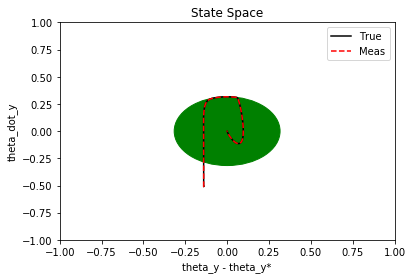

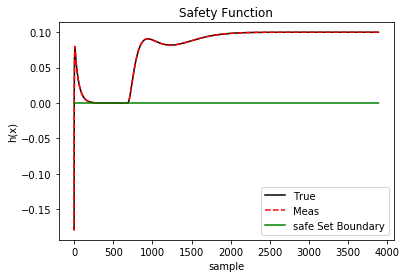

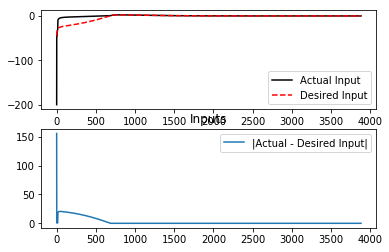

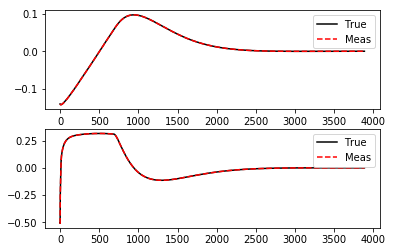

In [593]:
path = get_path("noNoise")
test = ecos_data(path)
test.evaluate_safety(0.1)
test.plot_contour((-1,1))
test.plot_inputs(200)
test.plot_states()


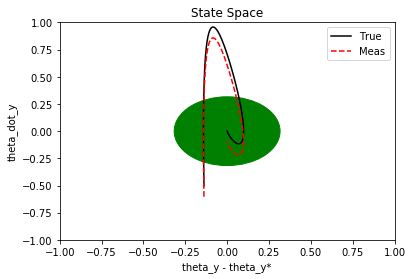

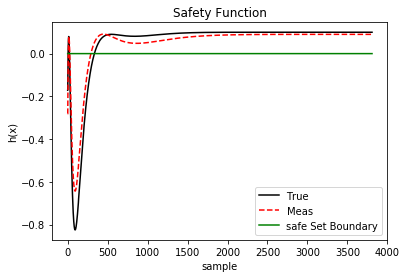

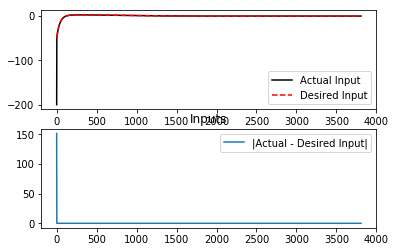

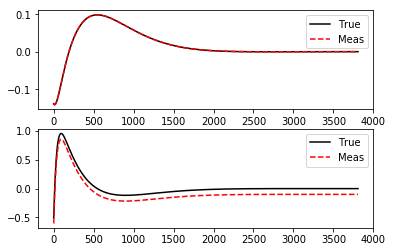

In [448]:
path = "../bags/noFilter/noFilter.csv"
test = ecos_data(path)
test.evaluate_safety(0.1)
test.plot_contour((-1,1))
test.plot_inputs(200)
test.plot_states()


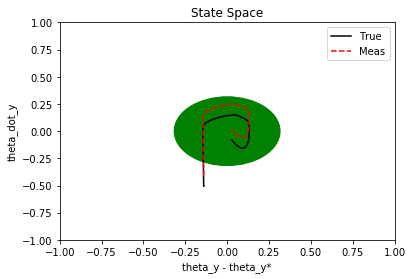

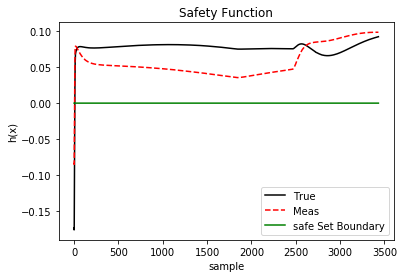

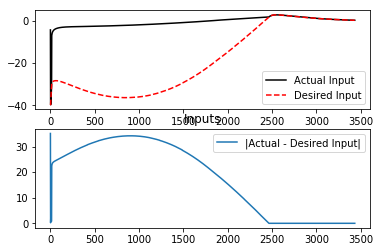

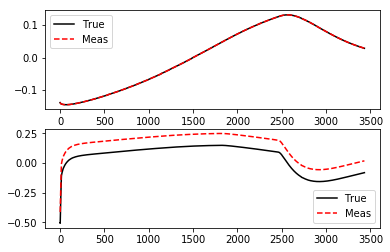

In [449]:
path = get_path("noisePosX6")
test = ecos_data(path)
test.evaluate_safety(0.1)
test.plot_contour((-1,1))
test.plot_inputs(200)
test.plot_states()


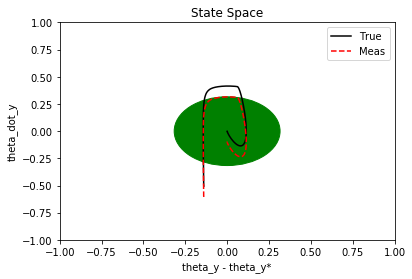

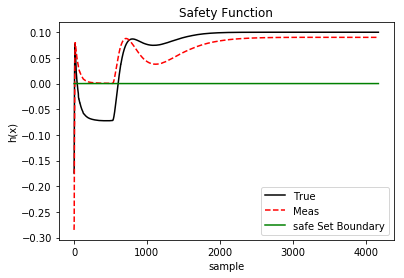

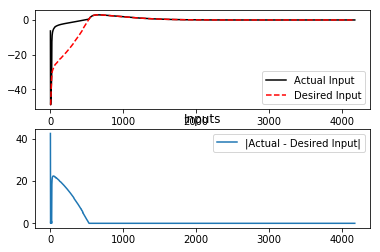

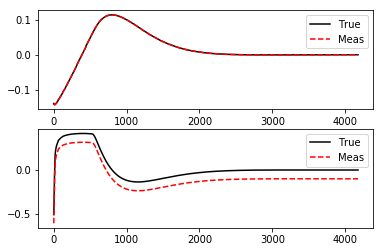

In [450]:
path = get_path("notRobust")
test = ecos_data(path)
test.evaluate_safety(0.1)
test.plot_contour((-1,1))
test.plot_inputs(200)
test.plot_states()


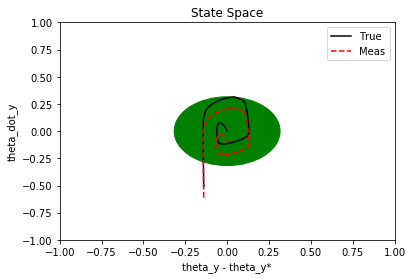

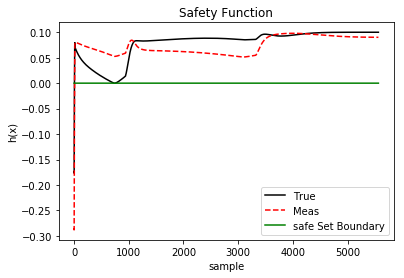

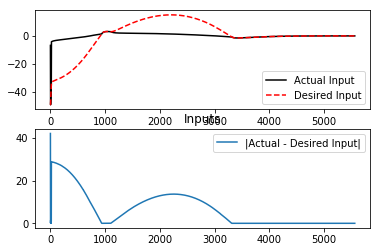

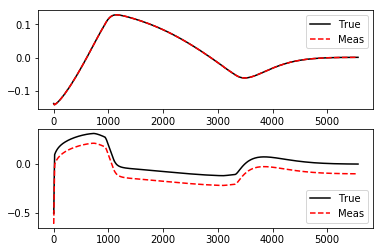

In [451]:
path = get_path("noiseNegX6")
test = ecos_data(path)
test.evaluate_safety(0.1)
test.plot_contour((-1,1))
test.plot_inputs(200)
test.plot_states()


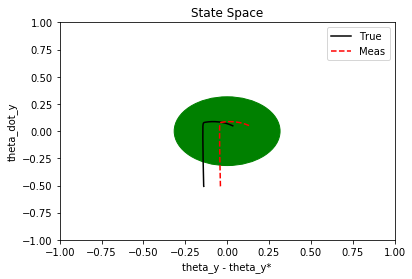

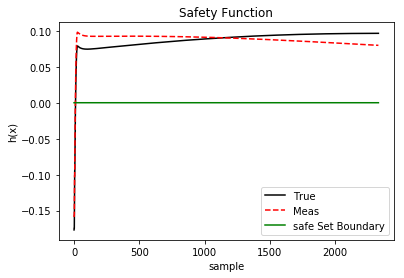

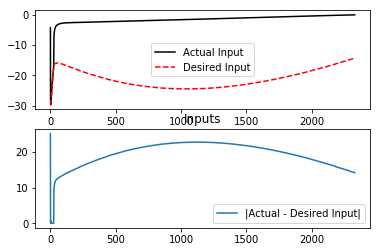

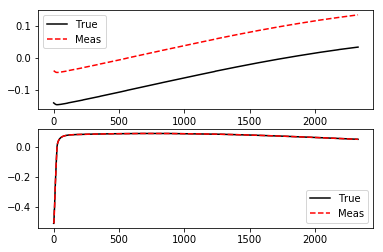

In [452]:
path = get_path("noiseX5")
test = ecos_data(path)
test.evaluate_safety(0.1)
test.plot_contour((-1,1))
test.plot_inputs(200)
test.plot_states()

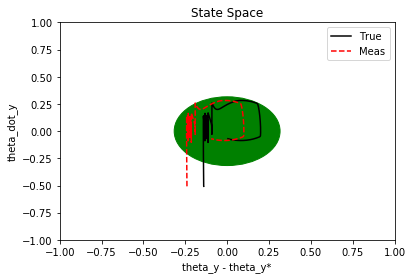

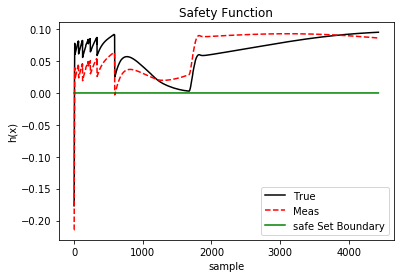

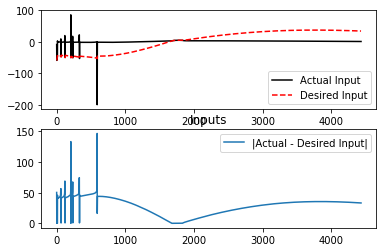

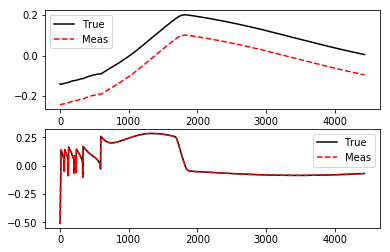

In [453]:
path = get_path("noiseNegX5") # stricter
test = ecos_data(path)
test.evaluate_safety(0.1)
test.plot_contour((-1,1))
test.plot_inputs(200)
test.plot_states()

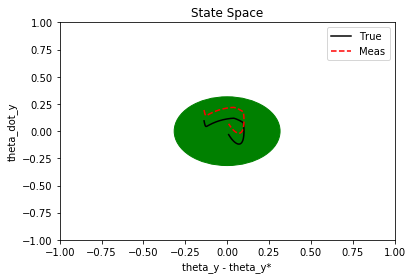

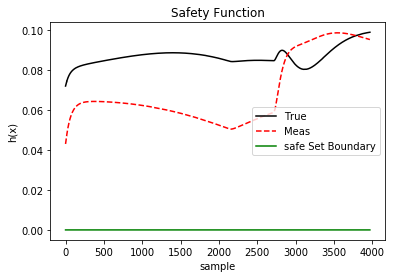

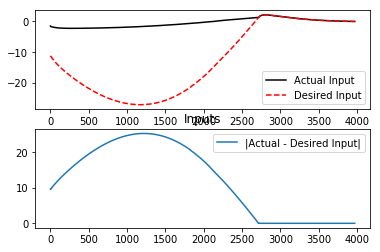

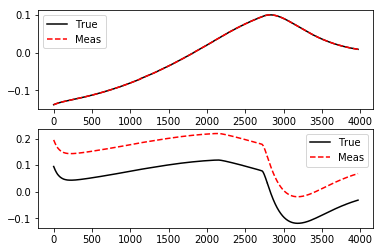

In [454]:
path = get_path("ic") # stricter
test = ecos_data(path)
test.evaluate_safety(0.1)
test.plot_contour((-1,1))
test.plot_inputs(200)
test.plot_states()

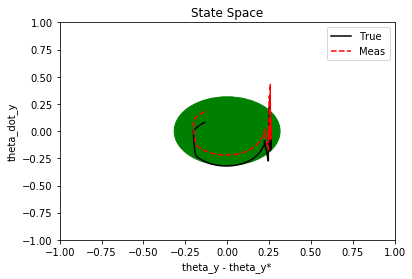

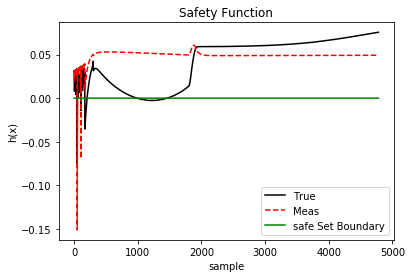

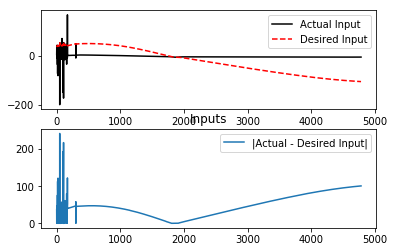

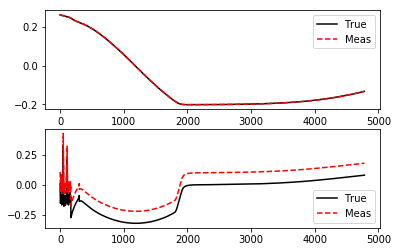

In [455]:
path = get_path("ic3") # stricter
test = ecos_data(path)
test.evaluate_safety(0.1)
test.plot_contour((-1,1))
test.plot_inputs(200)
test.plot_states()

In [ ]:
output['x'][2:4] =  [-11.4137, -11.4137]

def dynamics_to_integrate(X,t): 
    f , g = dynamics(X)
    xdot = f + np.matmul(g,np.matrix(output['x'][2:4]).transpose())
    xdot = np.array(xdot).squeeze()
    return xdot 

traj = odeint(dynamics_to_integrate, xCurrent, np.linspace(0,0.005, 10))

for x in traj: 
    print(-1/2*((x[5]-x5_eq)**2 + x[6]**2) + 0.1)

In [572]:
xCurrent = [-0.0001, -0.0000, 0.0000, -0.0204, 0.0000, -0.0077, -0.9575] 

feas_chart = []

L_lgh = 0.5
L_lfh = 0.1
alpha = 10
L_ah  = 5
epsilon =0.1
x5_eq = 0.138


for xdot in np.linspace(-1, 1, 21):
    for theta_y in np.linspace(-0.5+x5_eq, 0.5+x5_eq, 41):
        for thetadot_y in np.linspace(-0.5, 0.5, 41):
            xCurrent = [0.0, 0.0, 0.0, xdot, 0.0, theta_y, thetadot_y] 

            f,g = dynamics(xCurrent)
            # h = -(1/2)*(x[5]- x5_eq)^2 - (1/2)*x[6]^2 + C 
            # Safe Set: x[5]^2 + x[6]^2 <= 2*C 
            # Lfh(x) = -x[6]*x[5] - x[6]*f[6]  
            # Lgh(x) = -x[6]*g[6,[0,1]]
            Lfh = -xCurrent[6]*(xCurrent[5] - x5_eq + f[6])
            Lgh = -xCurrent[6]*g[6,[0,1]]  
            csf = -1/2*((xCurrent[5]-x5_eq)**2 + xCurrent[6]**2) + 0.1
            G  = [[-1/np.sqrt(2), 0, 0, 0], [-1/np.sqrt(2), 0, 0, 0 ], [0, 0, -1, 0], [0, 0, 0, -1], [0, 0, -Lgh[0],  -Lgh[1]],[0, 0, -epsilon*L_lgh, 0], [0, 0, 0, -epsilon*L_lgh]]
            G  = sp.sparse.csc_matrix(G)
            h  = np.array([1/np.sqrt(2), -1/np.sqrt(2), 0, 0, Lfh[0] + alpha*(csf) - (L_lfh + L_ah)*epsilon, 0, 0 ])
            cost = np.array([1.0, 0.0, 0.0, 0.0]) #-self.inputDes_.inputVec[0],  -self.inputDes_.inputVec[1]])


            dims = {
                'l': 0,
                'q': [4,3],
                'e': 0
            }

            output = ecos.solve(cost,G,h,dims, verbose=False)

            feas_chart.append([xdot, theta_y-x5_eq, thetadot_y, output["info"]["exitFlag"]])
    print xdot




-1.0
-0.9
-0.8
-0.7
-0.6
-0.5
-0.3999999999999999
-0.29999999999999993
-0.19999999999999996
-0.09999999999999998
0.0
0.10000000000000009
0.20000000000000018
0.30000000000000004
0.40000000000000013
0.5
0.6000000000000001
0.7000000000000002
0.8
0.9000000000000001
1.0


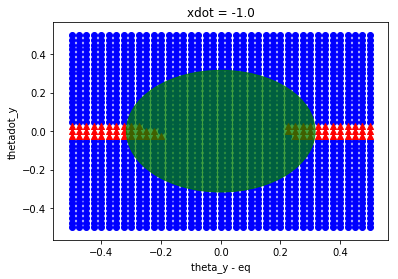

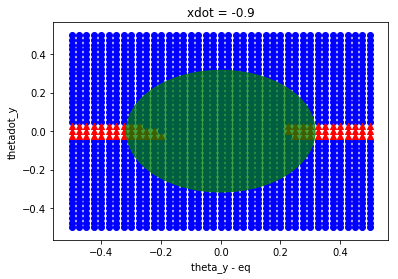

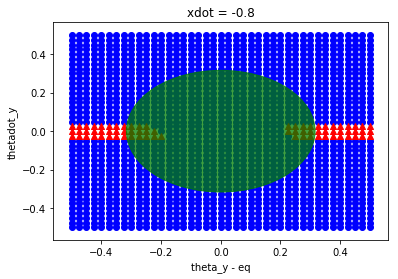

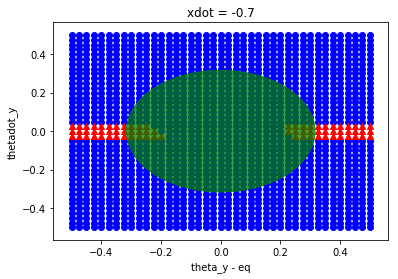

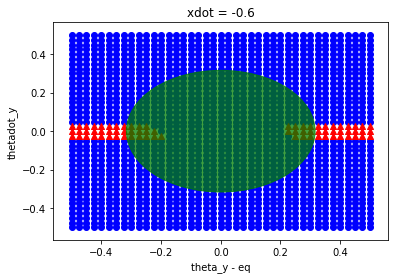

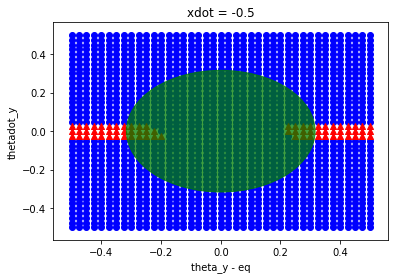

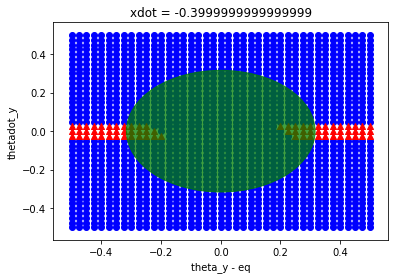

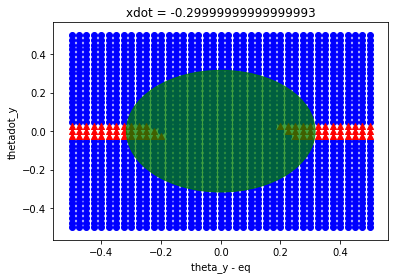

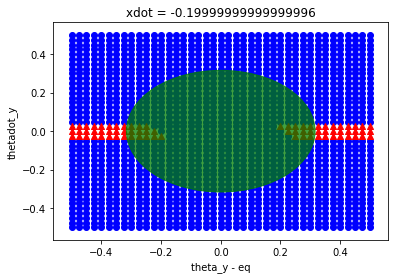

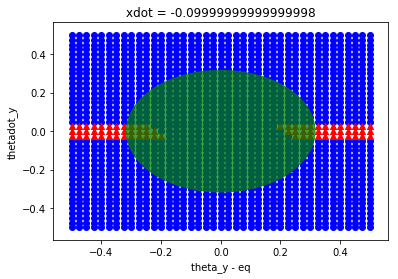

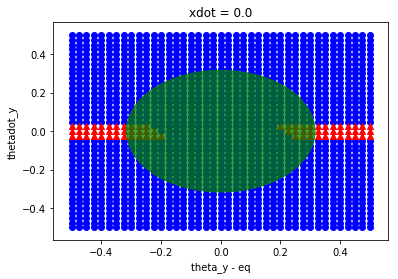

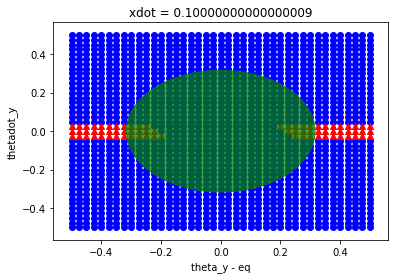

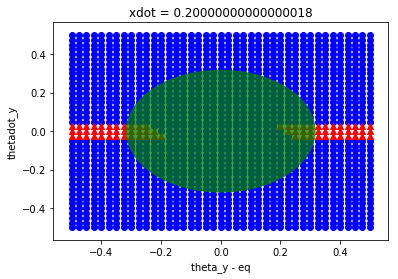

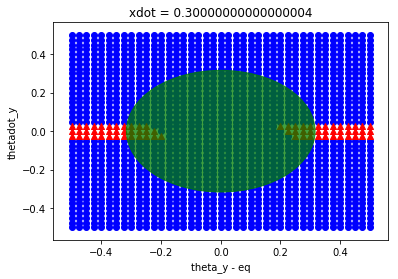

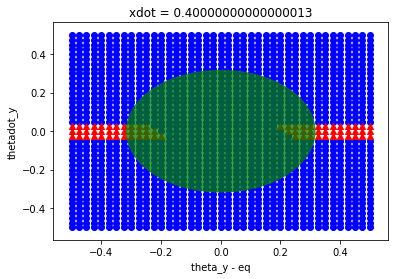

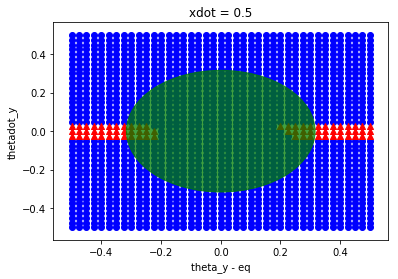

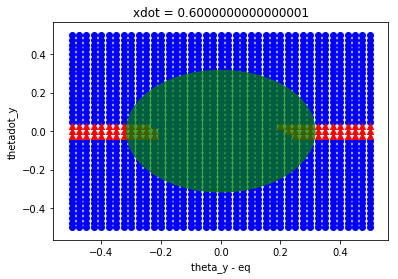

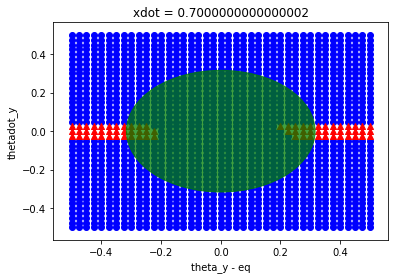

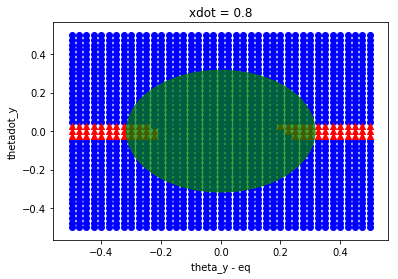

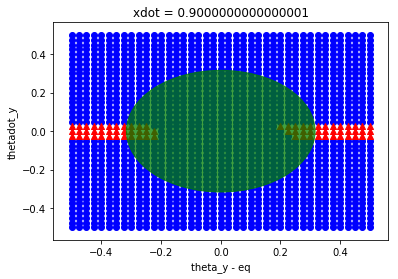

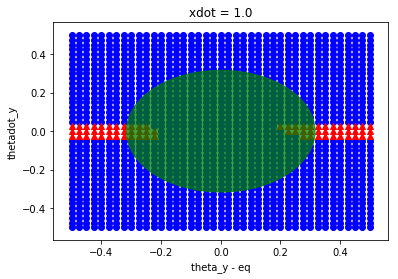

In [587]:
#for xdot in np.linspace(-10, 10, 20):
for xdot in np.linspace(-1, 1, 21):
    points_feas = np.array([p for p in feas_chart if xdot == p[0] and (p[3] == 0 or p[3] ==10) ])
    points_infeas = np.array([p for p in feas_chart if xdot == p[0] and (p[3] != 0 and p[3] !=10)])

    fig = plt.figure()
    ax = fig.gca()
    safeSet = plt.Circle((0, 0), np.sqrt(0.1), color='g', alpha=0.75)
    ax.add_artist(safeSet)
    if not points_feas.size==0 :
        ax.scatter(points_feas[:,1], points_feas[:,2], c='b', marker='o')
    if not points_infeas.size==0 :
        ax.scatter(points_infeas[:,1], points_infeas[:,2], c='r', marker='^')
    plt.xlabel("theta_y - eq")
    plt.ylabel("thetadot_y")
    plt.title("xdot = "+ str(xdot))
    plt.show()

[]